In [ ]:
import pandas as pd
import nltk
import numpy as np
import re

#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize, sent_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir('/content/gdrive/My Drive/Deep Learning/Code')
df=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

Mounted at /content/gdrive


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def process_sentence(sentence):
    new_tokens = word_tokenize(sentence)
    new_tokens = [token.lower() for token in new_tokens]
    new_tokens =[token for token in new_tokens if token not in stopwords.words('english')]
    new_tokens = [token for token in new_tokens if token.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(token) for token in new_tokens]
    return "".join(new_tokens)

In [ ]:
titles = df['title_orig'].tolist()
tokens = [process_sentence(t) for t in titles]
df['title_preprocessed'] = tokens
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,title_preprocessed
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,summervintageflamingoprintpajamasetcasualloose...
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,womancasualsummersleevelesssexyminidress
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,newarrivalwomanspringsummerbeachwearlongthinca...
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,hotsummercoolshirtwomanfashiontopbeeprintedlet...
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,womansummershortlaceelasticwaistbandloosethinc...


### Sentence Transformers: https://huggingface.co/sentence-transformers

<ipython-input-7-02460683962f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='high_sale', palette=['blue', 'orange'])


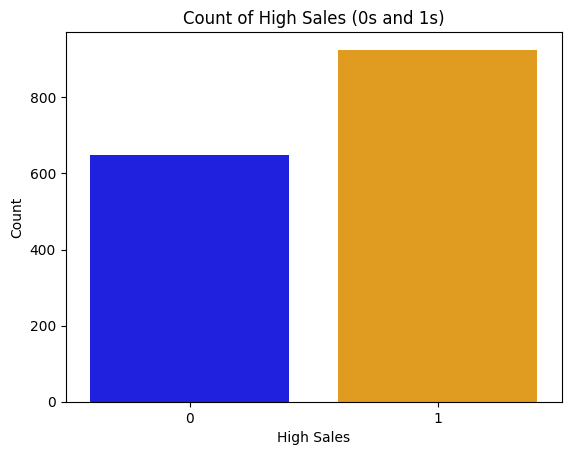

In [ ]:
label = [1 if sales > 300 else 0 for sales in df["units_sold"]]
df['high_sale'] = label

# Plotting with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='high_sale', palette=['blue', 'orange'])
plt.xlabel('High Sales')
plt.ylabel('Count')
plt.title('Count of High Sales (0s and 1s)')
plt.show()

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['high_sale'] == 1]
df_minority = df[df['high_sale'] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                               replace=True,
                               n_samples=len(df_majority),
                               random_state=42)

# Combine majority and upsampled minority
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Verify the balance
print("Original dataset shape:", df['high_sale'].value_counts())
print("\nBalanced dataset shape:", df_balanced['high_sale'].value_counts())

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

Original dataset shape: high_sale
1    925
0    648
Name: count, dtype: int64

Balanced dataset shape: high_sale
1    925
0    925
Name: count, dtype: int64


<ipython-input-9-90206697b221>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='high_sale', palette=['blue', 'orange'])


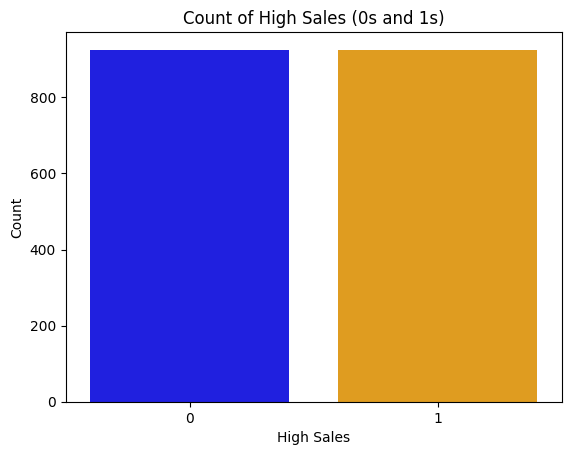

In [ ]:
sns.countplot(data=df_balanced, x='high_sale', palette=['blue', 'orange'])
plt.xlabel('High Sales')
plt.ylabel('Count')
plt.title('Count of High Sales (0s and 1s)')
plt.show()

In [ ]:
from transformers import BertTokenizer, TFBertModel
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', from_pt=True)
bert_model = TFBertModel.from_pretrained('bert-base-uncased', from_pt=True)

def encode_texts(texts, max_length=128):
    inputs = tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors="tf"
    )
    return inputs

def get_bert_embeddings(encoded_inputs):
    outputs = bert_model(encoded_inputs['input_ids'],
                        attention_mask=encoded_inputs['attention_mask'])
    return outputs.last_hidden_state[:, 0, :]

def process_in_batches(df, batch_size=32):
    """Process text data in batches to avoid memory issues"""
    all_embeddings = []

    # Calculate number of batches
    n_samples = len(df)
    n_batches = (n_samples + batch_size - 1) // batch_size

    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, n_samples)

        # Get batch of texts
        batch_texts = df['title_preprocessed'].iloc[start_idx:end_idx]

        # Process batch
        batch_encodings = encode_texts(batch_texts)
        batch_embeddings = get_bert_embeddings(batch_encodings)

        # Convert to numpy and store
        all_embeddings.append(batch_embeddings.numpy())

        # Optional: Print progress
        print(f"Processed batch {i+1}/{n_batches}", end='\r')

    # Combine all batches
    final_embeddings = np.vstack(all_embeddings)
    print("\nProcessing complete!")
    return final_embeddings

# Process data in batches
bert_embeddings_np = process_in_batches(df_balanced, batch_size=32)

print("BERT embeddings shape:", bert_embeddings_np.shape)

# Add embeddings as features
for i in range(bert_embeddings_np.shape[1]):
    df_balanced[f'bert_feature_{i}'] = bert_embeddings_np[:, i]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Processed batch 58/58
Processing complete!
BERT embeddings shape: (1850, 768)


In [ ]:
df_balanced.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,bert_feature_758,bert_feature_759,bert_feature_760,bert_feature_761,bert_feature_762,bert_feature_763,bert_feature_764,bert_feature_765,bert_feature_766,bert_feature_767
0,Women Fashion Casual Summer Sleeveless Blackle...,Women Fashion Casual Summer Sleeveless Blackle...,8.0,48,EUR,1000,0,4.34,794,500.0,...,0.559492,-0.112615,0.188137,0.100927,0.050367,-0.356640,0.187063,-0.523823,0.347043,0.290704
1,Summer Fashion Women Sexy Lace Strap Shirt Top...,Summer Fashion Women Sexy Lace Strap Shirt Top...,5.0,5,EUR,100,0,4.50,6,4.0,...,-0.071691,-0.202580,-0.303159,0.287147,0.111627,-0.196292,-0.251776,0.053821,0.119174,0.348739
2,Nouvelle femme d'été pour femmes Camisole exte...,Woman's New Summer Women Stretchy Camisole Sp...,12.0,11,EUR,1000,0,3.82,428,189.0,...,0.559492,-0.112615,0.188137,0.100927,0.050367,-0.356640,0.187063,-0.523823,0.347043,0.290704
3,Robe d'été à manches courtes de patineuse pour...,Women Fashion Lace Party Cocktail Mini Dress L...,16.0,34,EUR,5000,1,4.28,1612,976.0,...,0.129669,-0.436844,0.107216,0.014932,0.153558,-0.117942,-0.137476,-0.159793,0.094777,0.083682
4,Femmes été au large de Sholuder col rond impri...,Women Summer Off Sholuder Round Neck Printed B...,11.0,10,EUR,100,1,3.50,10,4.0,...,0.112947,-0.307585,0.134283,0.083540,0.240180,-0.270735,-0.122798,-0.179961,0.122129,0.098268


In [ ]:
# product color
def main_color(s):
    main_color = {"red":"red", "white":"white", "pink":"pink", "yellow":"yellow", "green":"green", "blue":"blue", "wine":"red", "burgundy":"red", "black":"black", "navy":"navy", "orange":"orange",
    "rose":"pink", "gray":"gray", "grey":"gray", "purple":"purple", "violet":"purple", "army":"green", "leopard":"orange", "ivory":"white",
    "brown":"brown", "coffee":"brown", "camel":"beige", "tan":"brown", "nude":"beige", "khaki":"khaki", "apricot":"yellow", "camouflage":"green", "jasper":"red"}  # ordered by importance
    for key, value in main_color.items():
        if key in s:
            return value
    return "others"
product_color = df_balanced["product_color"]
product_color = [x.lower() if type(x) is str else 'nan' for x in product_color]
product_color = [main_color(color) for color in product_color]
from matplotlib import colors
rgb = []
for s in product_color:
  if s != "others":
    rgb.append(np.array(colors.to_rgb(s)))
rgb = np.array(rgb)
avg_rgb = np.average(rgb, axis=0)
product_colors = [avg_rgb if s == "others" else np.array(colors.to_rgb(s)) for s in product_color]
df_balanced['product_color_rgb'] = product_colors

# log prices
df_balanced['log_price'] = [np.log(p) for p in df_balanced["price"]]
df_balanced['log_retail_price'] = [np.log(p) for p in df_balanced["retail_price"]]

# log merchant rating count
df_balanced['log_merchant_rating_count'] = np.log(df_balanced['merchant_rating_count'])

# urgent text
df_balanced['urgent'] = [1 if s == "Quantité limitée !" else 0 for s in df_balanced["urgency_text"]]
df_balanced["discount_ratio"] = [df_balanced["price"][i]/df_balanced["retail_price"][i] for i in range(len(df_balanced["price"]))]

df_balanced.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,bert_feature_764,bert_feature_765,bert_feature_766,bert_feature_767,product_color_rgb,log_price,log_retail_price,log_merchant_rating_count,urgent,discount_ratio
0,Women Fashion Casual Summer Sleeveless Blackle...,Women Fashion Casual Summer Sleeveless Blackle...,8.0,48,EUR,1000,0,4.34,794,500.0,...,0.187063,-0.523823,0.347043,0.290704,"[0.0, 0.0, 1.0]",2.079442,3.871201,8.132413,0,0.166667
1,Summer Fashion Women Sexy Lace Strap Shirt Top...,Summer Fashion Women Sexy Lace Strap Shirt Top...,5.0,5,EUR,100,0,4.50,6,4.0,...,-0.251776,0.053821,0.119174,0.348739,"[1.0, 0.7529411764705882, 0.796078431372549]",1.609438,1.609438,9.268609,0,1.000000
2,Nouvelle femme d'été pour femmes Camisole exte...,Woman's New Summer Women Stretchy Camisole Sp...,12.0,11,EUR,1000,0,3.82,428,189.0,...,0.187063,-0.523823,0.347043,0.290704,"[1.0, 0.0, 0.0]",2.484907,2.397895,9.843260,1,1.090909
3,Robe d'été à manches courtes de patineuse pour...,Women Fashion Lace Party Cocktail Mini Dress L...,16.0,34,EUR,5000,1,4.28,1612,976.0,...,-0.137476,-0.159793,0.094777,0.083682,"[0.0, 0.0, 0.0]",2.772589,3.526361,12.340061,1,0.470588
4,Femmes été au large de Sholuder col rond impri...,Women Summer Off Sholuder Round Neck Printed B...,11.0,10,EUR,100,1,3.50,10,4.0,...,-0.122798,-0.179961,0.122129,0.098268,"[1.0, 0.0, 0.0]",2.397895,2.302585,9.466454,0,1.100000


In [ ]:
rgb = df_balanced["product_color_rgb"]
rgb = np.stack(rgb.values, axis=0)
for i in range(3):
    df_balanced["product_color_rgb"+str(i)] = rgb[:,i]
df_balanced.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,bert_feature_767,product_color_rgb,log_price,log_retail_price,log_merchant_rating_count,urgent,discount_ratio,product_color_rgb0,product_color_rgb1,product_color_rgb2
0,Women Fashion Casual Summer Sleeveless Blackle...,Women Fashion Casual Summer Sleeveless Blackle...,8.0,48,EUR,1000,0,4.34,794,500.0,...,0.290704,"[0.0, 0.0, 1.0]",2.079442,3.871201,8.132413,0,0.166667,0.0,0.000000,1.000000
1,Summer Fashion Women Sexy Lace Strap Shirt Top...,Summer Fashion Women Sexy Lace Strap Shirt Top...,5.0,5,EUR,100,0,4.50,6,4.0,...,0.348739,"[1.0, 0.7529411764705882, 0.796078431372549]",1.609438,1.609438,9.268609,0,1.000000,1.0,0.752941,0.796078
2,Nouvelle femme d'été pour femmes Camisole exte...,Woman's New Summer Women Stretchy Camisole Sp...,12.0,11,EUR,1000,0,3.82,428,189.0,...,0.290704,"[1.0, 0.0, 0.0]",2.484907,2.397895,9.843260,1,1.090909,1.0,0.000000,0.000000
3,Robe d'été à manches courtes de patineuse pour...,Women Fashion Lace Party Cocktail Mini Dress L...,16.0,34,EUR,5000,1,4.28,1612,976.0,...,0.083682,"[0.0, 0.0, 0.0]",2.772589,3.526361,12.340061,1,0.470588,0.0,0.000000,0.000000
4,Femmes été au large de Sholuder col rond impri...,Women Summer Off Sholuder Round Neck Printed B...,11.0,10,EUR,100,1,3.50,10,4.0,...,0.098268,"[1.0, 0.0, 0.0]",2.397895,2.302585,9.466454,0,1.100000,1.0,0.000000,0.000000


In [ ]:
label = [1 if sales > 300 else 0 for sales in df_balanced["units_sold"]]
df_balanced['high_sale'] = label

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Columns: 822 entries, title to product_color_rgb2
dtypes: float32(768), float64(16), int64(17), object(21)
memory usage: 6.2+ MB


In [ ]:
X = df_balanced[["log_price", "log_retail_price", "uses_ad_boosts", "badges_count", "badge_local_product","badge_product_quality", "badge_fast_shipping", "urgent", "discount_ratio",
                    "product_color_rgb0", "product_color_rgb1", "product_color_rgb2", "shipping_option_price", "shipping_is_express", "countries_shipped_to", "inventory_total"]]
y = df_balanced['high_sale']

In [ ]:
# Loop over column names and assign them to X
for i in range(768):  # Since there are 768 BERT features
    X[f'bert_feature_{i}'] = df_balanced[f'bert_feature_{i}']


In [ ]:
y.shape

(1850,)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf

def create_model(input_shape_bert, input_shape_numeric):
    # Input layers
    bert_input = Input(shape=(input_shape_bert,), name='bert_input')
    numeric_input = Input(shape=(input_shape_numeric,), name='numeric_input')

    # BERT features processing branch
    bert_x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(bert_input)
    bert_x = BatchNormalization()(bert_x)
    bert_x = Dropout(0.3)(bert_x)

    bert_x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(bert_x)
    bert_x = BatchNormalization()(bert_x)
    bert_x = Dropout(0.3)(bert_x)

    # Numeric features processing branch
    numeric_x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(numeric_input)
    numeric_x = BatchNormalization()(numeric_x)
    numeric_x = Dropout(0.2)(numeric_x)

    numeric_x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(numeric_x)
    numeric_x = BatchNormalization()(numeric_x)
    numeric_x = Dropout(0.2)(numeric_x)

    # Combine both branches
    combined = Concatenate()([bert_x, numeric_x])

    # Final dense layers
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[bert_input, numeric_input], outputs=output)

    # Compile with reduced learning rate
    optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model


In [ ]:
from sklearn.model_selection import train_test_split
# Prepare data
numeric_features = ['log_price', 'log_retail_price', 'uses_ad_boosts', 'badges_count',
                   'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
                   'urgent', 'discount_ratio', 'product_color_rgb0', 'product_color_rgb1',
                   'product_color_rgb2', 'shipping_option_price', 'shipping_is_express',
                   'countries_shipped_to', 'inventory_total']
bert_features = [f'bert_feature_{i}' for i in range(768)]

X_bert = df_balanced[bert_features].values
X_numeric = df_balanced[numeric_features].values
y = df_balanced['high_sale'].values

# Split data
X_bert_train, X_bert_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_bert, X_numeric, y, test_size=0.125, random_state=42
)

X_bert_train, X_bert_val, X_numeric_train, X_numeric_val, y_train, y_val = train_test_split(
    X_bert_train, X_numeric_train, y_train, test_size=0.14286, random_state=42
)

# Create and train model
model = create_model(input_shape_bert=768, input_shape_numeric=len(numeric_features))

In [ ]:
# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        min_delta=0.001
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        min_lr=1e-6
    )
]

# Train model
history = model.fit(
    [X_bert_train, X_numeric_train],
    y_train,
    validation_data=([X_bert_val, X_numeric_val], y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 398ms/step - accuracy: 0.5106 - loss: 7.9269 - val_accuracy: 0.4741 - val_loss: 7.6183 - learning_rate: 1.0000e-04
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5207 - loss: 7.6567 - val_accuracy: 0.4914 - val_loss: 7.3524 - learning_rate: 1.0000e-04
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5612 - loss: 7.3965 - val_accuracy: 0.5603 - val_loss: 7.1277 - learning_rate: 1.0000e-04
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5748 - loss: 7.1331 - val_accuracy: 0.5474 - val_loss: 6.9296 - learning_rate: 1.0000e-04
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5917 - loss: 6.9257 - val_accuracy: 0.5948 - val_loss: 6.7109 - learning_rate: 1.0000e-04
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5377 - loss: 6.7728 - val_accuracy: 0.6207 - val_loss: 6.5220 - learning_rate: 1.0000e-04
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5

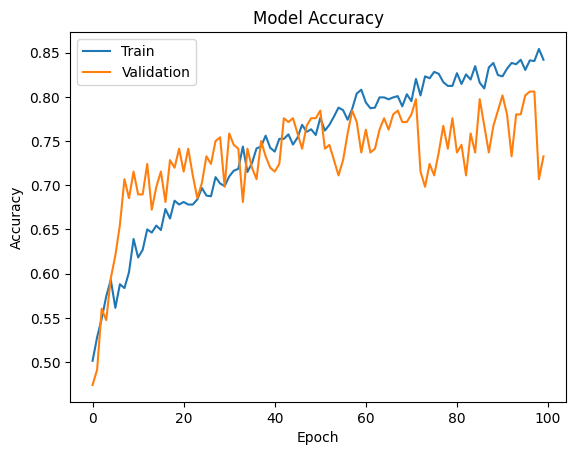

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


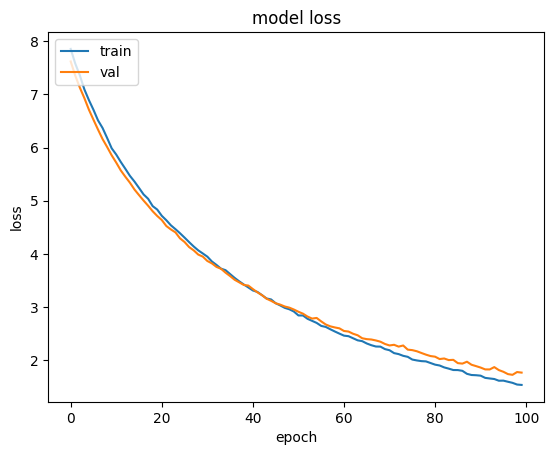

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict on the test data
y_pred_prob = model.predict([X_bert_test, X_numeric_test])

# Convert probabilities to binary predictions (threshold 0.5 for sigmoid activation)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
Accuracy on test data: 0.77
